Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-Processing

In [4]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv("C:/Users/sriwa/Downloads/movies.csv")

In [32]:
pd.set_option('display.max_columns', None) # it displays all the columns

In [33]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
# number of rows and columns in the data frame

movies_data.shape

(4803, 24)

In [28]:
movies_data.isna().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [30]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [31]:
list(movies_data.columns)

['index',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

Text(0.5, 1.0, 'Popular Movies')

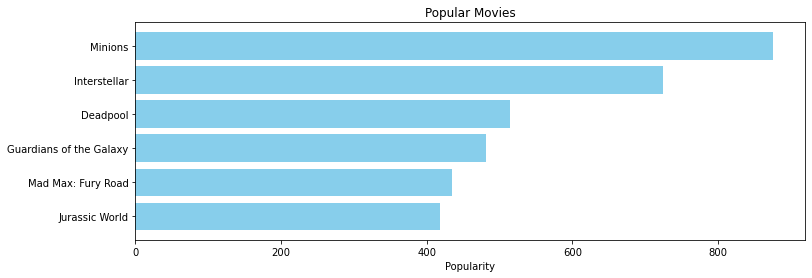

In [36]:
pop= movies_data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [37]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director','vote_average']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director', 'vote_average']


In [38]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [40]:
movies_data['vote_average'] = movies_data['vote_average'].astype(str)

In [41]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']+' '+movies_data['vote_average']

In [42]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [43]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [44]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [13]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

Cosine Similarity

In [45]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [46]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [47]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [48]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Harry Potter and the Chamber of Secrets


In [49]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [50]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Harry Potter and the Chamber of Secrets', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix']


In [51]:
close_match = find_close_match[0]
print(close_match)

Harry Potter and the Chamber of Secrets


In [52]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

276


In [53]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.025620367109928224), (1, 0.0383205055943936), (2, 0.033875941767466465), (3, 0.005645623203757846), (4, 0.030187853159166646), (5, 0.026540694472725085), (6, 0.048955662370000125), (7, 0.044891554779073084), (8, 0.353818535169164), (9, 0.0202794462533665), (10, 0.02881701470740959), (11, 0.029413331029784728), (12, 0.09363885281385319), (13, 0.01219498517213688), (14, 0.025453421201767072), (15, 0.02870851456875638), (16, 0.04256673652594172), (17, 0.02008611669264171), (18, 0.07047266213533292), (19, 0.041366475538587), (20, 0.0560769794943312), (21, 0.006858610610743335), (22, 0.038515418912879004), (23, 0.06378567537725684), (24, 0.017249940676389252), (25, 0.0), (26, 0.027422802576780543), (27, 0.012050568721468018), (28, 0.04160022739729045), (29, 0.06299781270909358), (30, 0.08647648028800925), (31, 0.0179693289237754), (32, 0.04984458095949468), (33, 0.00819768022732931), (34, 0.009640350703660707), (35, 0.019362578212144353), (36, 0.017447228137985597), (37, 0.1227251160

In [54]:
len(similarity_score)

4803

In [55]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(276, 1.0000000000000002), (197, 0.6199376464059354), (191, 0.5080275299398772), (113, 0.47348999146639353), (8, 0.353818535169164), (114, 0.2822886196766204), (80, 0.1340116801530952), (3290, 0.13391277508046218), (2178, 0.1264078498682601), (2343, 0.12485457268758561), (2511, 0.1239606577192593), (37, 0.12272511607148778), (189, 0.11541240369445582), (2756, 0.11539953193223398), (2086, 0.11481095459917952), (3616, 0.11335395942713701), (901, 0.11188564692065237), (2449, 0.11180454046897403), (2568, 0.10927757906468269), (105, 0.10743239687862306), (331, 0.10679240344744467), (3681, 0.10631088700901994), (143, 0.10526565830444905), (3364, 0.10480978936532925), (2161, 0.10431857628997869), (464, 0.10402984209492776), (1078, 0.10375199645604123), (92, 0.10158648981769969), (518, 0.10009625261015506), (1152, 0.10003701948024384), (743, 0.09986902771235623), (405, 0.09856540945344114), (3670, 0.09769778668526595), (234, 0.09577272935948108), (1984, 0.09487422754582839), (4801, 0.09476074

In [56]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Harry Potter and the Chamber of Secrets
2 . Harry Potter and the Philosopher's Stone
3 . Harry Potter and the Prisoner of Azkaban
4 . Harry Potter and the Order of the Phoenix
5 . Harry Potter and the Half-Blood Prince
6 . Harry Potter and the Goblet of Fire
7 . Snow White and the Huntsman
8 . Wild Target
9 . Into the Wild
10 . Conan the Destroyer
11 . Home Alone
12 . Oz: The Great and Powerful
13 . Noah
14 . Crazy/Beautiful
15 . Home Alone 2: Lost in New York
16 . Robin and Marian
17 . Robin Hood: Prince of Thieves
18 . Sense and Sensibility
19 . The Craft
20 . Alice Through the Looking Glass
21 . Seventh Son
22 . Driving Lessons
23 . Pan
24 . Warlock
25 . Quigley Down Under
26 . Hotel Transylvania 2
27 . The Ant Bully
28 . How to Train Your Dragon
29 . Inspector Gadget
